# Lab06 - PyTorch Introduction

## Tensor Creation and Inspection

In [1]:
import torch
import torch.nn as nn

In [2]:
t1=torch.tensor([2.1,9.0,4.2])
t2=torch.tensor([7.3,5.5,3.0])
t3=t1+t2
print(t3,t3.shape,t3.ndim,t3.dtype)
t3= t3.to(torch.float64)
print(t3.dtype)

tensor([ 9.4000, 14.5000,  7.2000]) torch.Size([3]) 1 torch.float32
torch.float64


In [3]:
from timeit import timeit
M1_64=torch.randn(1000,1000,dtype=torch.float64)
M2_64=torch.randn(1000,1000,dtype=torch.float64)
M1_32=torch.randn(1000,1000,dtype=torch.float32)
M2_32=torch.randn(1000,1000,dtype=torch.float32)

t64 = timeit ( lambda : M1_64 @ M2_64 , number =100)
t32 = timeit ( lambda : M1_32 @ M2_32 , number =100)
print (f"Time for matrix multiplication(float64):{t64:.4f}s")
print (f"Time for matrix multiplication(float32):{t32:.4f}s")

Time for matrix multiplication(float64):1.2330s
Time for matrix multiplication(float32):0.2528s


## Datasets and Dataloaders

In [4]:
from torch.utils.data import TensorDataset, DataLoader

X = torch.randn(2048, 1)
eps = torch.randn(2048, 1)   
y = 5*X + 3 + eps
dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=256,shuffle=True)

for batch_X, batch_y in loader:
    print("Input batch shape:", batch_X.shape)
    print("Target batch shape:", batch_y.shape)
    break 

Input batch shape: torch.Size([256, 1])
Target batch shape: torch.Size([256, 1])


## Building and understanding a simple linear model

In [5]:
class SimpleLinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleLinearModel, self ).__init__()
        self.linear=nn.Linear(input_size, output_size)
    def forward(self, x):
        x = self.linear(x)
        return x

model = SimpleLinearModel(1,1)
x_test = torch.tensor([[2.0]])
y_pred = model(x_test)
print("Output shape:", y_pred.shape)
for name, param in model.named_parameters():
    print(f"{name}: {param.data}, requires_grad={param.requires_grad}")


Output shape: torch.Size([1, 1])
linear.weight: tensor([[0.9383]]), requires_grad=True
linear.bias: tensor([0.1944]), requires_grad=True


In [6]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model.to(device)

num_epochs = 50
losses, weights, biases = [],[],[]
model.train()
for epoch in range(num_epochs) :
    running_loss = 0.0
    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward() 
        optimizer.step()
        losses.append(loss.item())
        weights.append(model.linear.weight.item())
        biases.append(model.linear.bias.item())
        running_loss += loss.item()
    print (f"Epoch[{epoch+1}/{num_epochs}]-Loss:{running_loss/len(loader):.4f}")

Using device: cpu
Epoch[1/50]-Loss:20.8722
Epoch[2/50]-Loss:15.7111
Epoch[3/50]-Loss:11.8898
Epoch[4/50]-Loss:9.0623
Epoch[5/50]-Loss:6.9679
Epoch[6/50]-Loss:5.4166
Epoch[7/50]-Loss:4.2684
Epoch[8/50]-Loss:3.4185
Epoch[9/50]-Loss:2.7891
Epoch[10/50]-Loss:2.3231
Epoch[11/50]-Loss:1.9777
Epoch[12/50]-Loss:1.7220
Epoch[13/50]-Loss:1.5331
Epoch[14/50]-Loss:1.3932
Epoch[15/50]-Loss:1.2896
Epoch[16/50]-Loss:1.2130
Epoch[17/50]-Loss:1.1564
Epoch[18/50]-Loss:1.1144
Epoch[19/50]-Loss:1.0834
Epoch[20/50]-Loss:1.0602
Epoch[21/50]-Loss:1.0432
Epoch[22/50]-Loss:1.0305
Epoch[23/50]-Loss:1.0210
Epoch[24/50]-Loss:1.0140
Epoch[25/50]-Loss:1.0090
Epoch[26/50]-Loss:1.0052
Epoch[27/50]-Loss:1.0024
Epoch[28/50]-Loss:1.0003
Epoch[29/50]-Loss:0.9987
Epoch[30/50]-Loss:0.9975
Epoch[31/50]-Loss:0.9967
Epoch[32/50]-Loss:0.9961
Epoch[33/50]-Loss:0.9957
Epoch[34/50]-Loss:0.9953
Epoch[35/50]-Loss:0.9951
Epoch[36/50]-Loss:0.9948
Epoch[37/50]-Loss:0.9948
Epoch[38/50]-Loss:0.9946
Epoch[39/50]-Loss:0.9946
Epoch[40/50]-

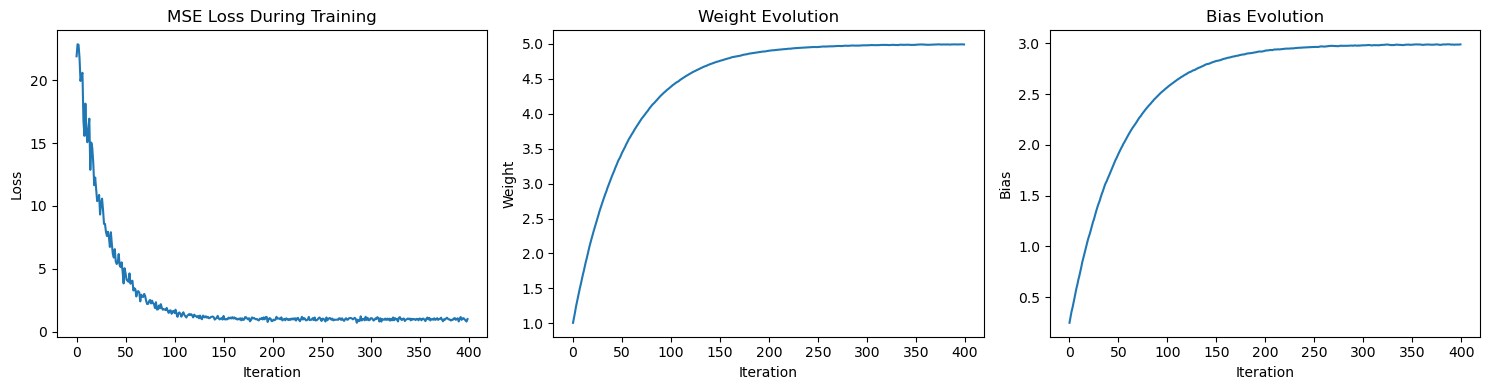

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('MSE Loss During Training')

plt.subplot(1, 3, 2)
plt.plot(weights)
plt.xlabel('Iteration')
plt.ylabel('Weight')
plt.title('Weight Evolution')

plt.subplot(1, 3, 3)
plt.plot(biases)
plt.xlabel('Iteration')
plt.ylabel('Bias')
plt.title('Bias Evolution')

plt.tight_layout()
plt.show()


## MNIST dataset

In [8]:
from torchvision import datasets, transforms

transform = transforms.ToTensor()
transform = transforms.Compose([
    transforms.RandomRotation(45),                 
    transforms.ToTensor(),
    transforms.Lambda(lambda x: (x - x.mean()) / x.std())
])

train_dataset = datasets.MNIST(root = "data",transform=transform ,train = True , download = True)
test_dataset = datasets.MNIST(root = "data",transform=transform, train = False, download = True)

Number of training samples: 60000
Number of test samples: 10000
Image tensor shape: torch.Size([1, 28, 28])
Label: 5


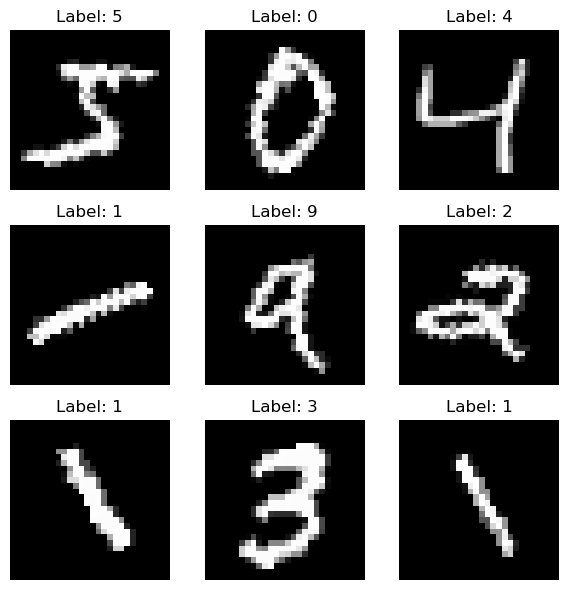

In [9]:
print("Number of training samples:", len(train_dataset))
print("Number of test samples:", len(test_dataset))
image, label = train_dataset[0]
print("Image tensor shape:", image.shape)
print("Label:", label)

fig, axes = plt.subplots(3, 3, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    img, label = train_dataset[i]
    ax.imshow(img.squeeze(), cmap="gray") 
    ax.set_title(f"Label: {label}")
    ax.axis("off")
plt.tight_layout()
plt.show()


## A more complex neural network

In [10]:
import torch.nn.functional as F
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN,self).__init__()
        self.fc1 = nn.Linear(28*28, 512)   
        self.fc2 = nn.Linear(512, 256) 
        self.fc3 = nn.Linear(256, 10) 
        
    def forward(self,x):
        x = x.reshape(x.size(0), -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [11]:
train_loader = DataLoader(train_dataset, batch_size=1024,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model=SimpleNN().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Using device: cpu


In [12]:
num_epochs = 5
batch_size = 64
learning_rate = 0.01

@torch.no_grad()
def validate(model, dataloader, device):
    model.eval()
    correct, total = 0, 0
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return 100 * correct / total


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()    
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {avg_loss:.4f}")

test_accuracy = validate(model, test_loader, device)
print(f"\nFinal Test Accuracy: {test_accuracy:.2f}%")

Epoch [1/5] - Loss: 2.2425
Epoch [2/5] - Loss: 2.0679
Epoch [3/5] - Loss: 1.7770
Epoch [4/5] - Loss: 1.4222
Epoch [5/5] - Loss: 1.1414

Final Test Accuracy: 73.04%
